<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [118]:
import pandas as pd

In [119]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [120]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [121]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [122]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ACT

In [3]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')
df_cleaned=df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

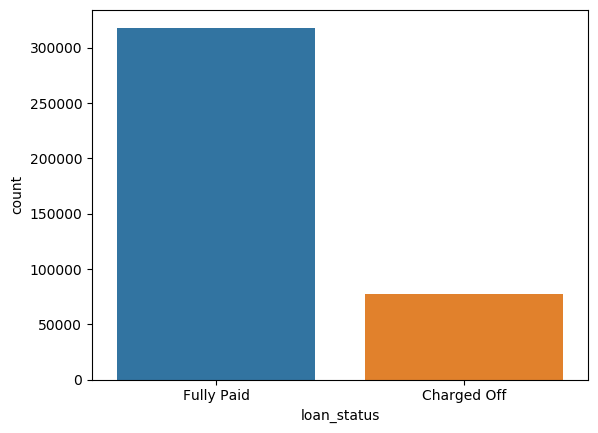

In [8]:
# CODE HERE
sns.countplot(data=df,x='loan_status')

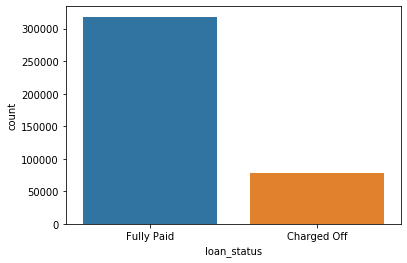

**TASK: Create a histogram of the loan_amnt column.**

C:\Users\moham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

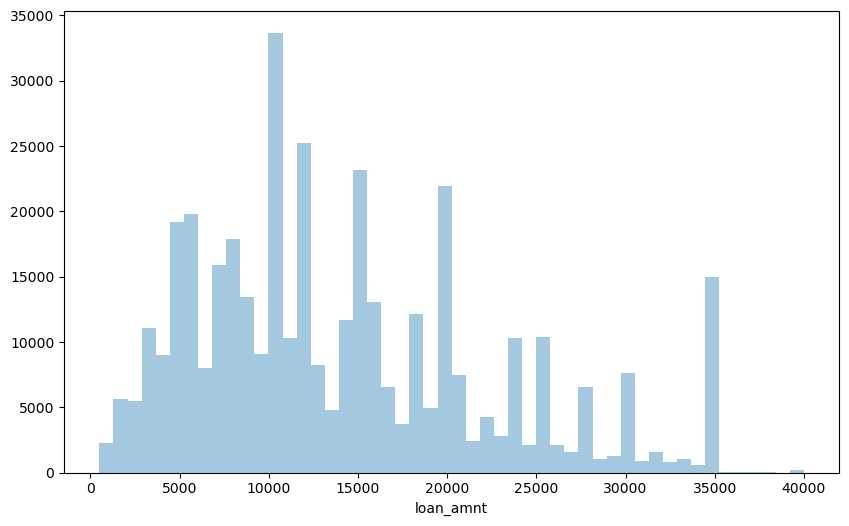

In [8]:
# CODE HERE
plt.figure(figsize = (10,6))
sns.distplot(df['loan_amnt'],kde=False)

(0, 45000)

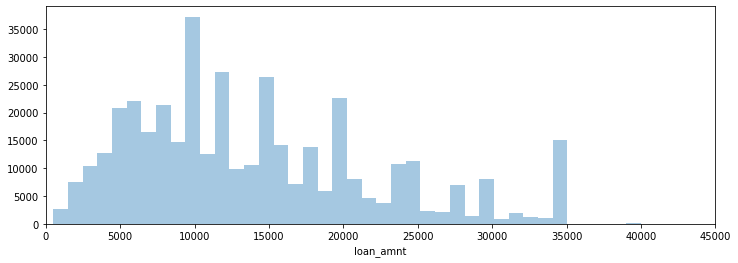

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [10]:
# CODE HERE
a=df.drop(['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status','purpose','title','initial_list_status','application_type','address','earliest_cr_line'], axis=1).corr()
a.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.003417,0.997679,0.471415,-0.242825,0.132328,-0.529914,0.441104,0.006845,0.126290,0.199529,-0.559536
int_rate,0.003417,1.000000,0.013182,-0.372987,0.004725,-0.320767,-0.071324,-0.269069,0.423728,-0.447747,-0.468338,-0.073108
installment,0.997679,0.013182,1.000000,0.461846,-0.241786,0.112066,-0.517974,0.431340,0.029986,0.098506,0.170268,-0.549133
annual_inc,0.471415,-0.372987,0.461846,1.000000,-0.395009,0.113384,-0.366245,0.445215,-0.144807,0.181545,0.335421,-0.401277
dti,-0.242825,0.004725,-0.241786,-0.395009,1.000000,0.053433,-0.196459,-0.125327,0.023584,-0.051486,-0.288733,-0.179521
open_acc,0.132328,-0.320767,0.112066,0.113384,0.053433,1.000000,-0.308629,0.194417,-0.483962,0.874395,0.149745,-0.298729
pub_rec,-0.529914,-0.071324,-0.517974,-0.366245,-0.196459,-0.308629,1.000000,-0.591810,-0.345899,-0.271371,-0.251708,0.933083
revol_bal,0.441104,-0.269069,0.431340,0.445215,-0.125327,0.194417,-0.591810,1.000000,0.190442,0.148716,0.210179,-0.612642
revol_util,0.006845,0.423728,0.029986,-0.144807,0.023584,-0.483962,-0.345899,0.190442,1.000000,-0.525743,-0.257723,-0.353887
total_acc,0.126290,-0.447747,0.098506,0.181545,-0.051486,0.874395,-0.271371,0.148716,-0.525743,1.000000,0.458876,-0.242302


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

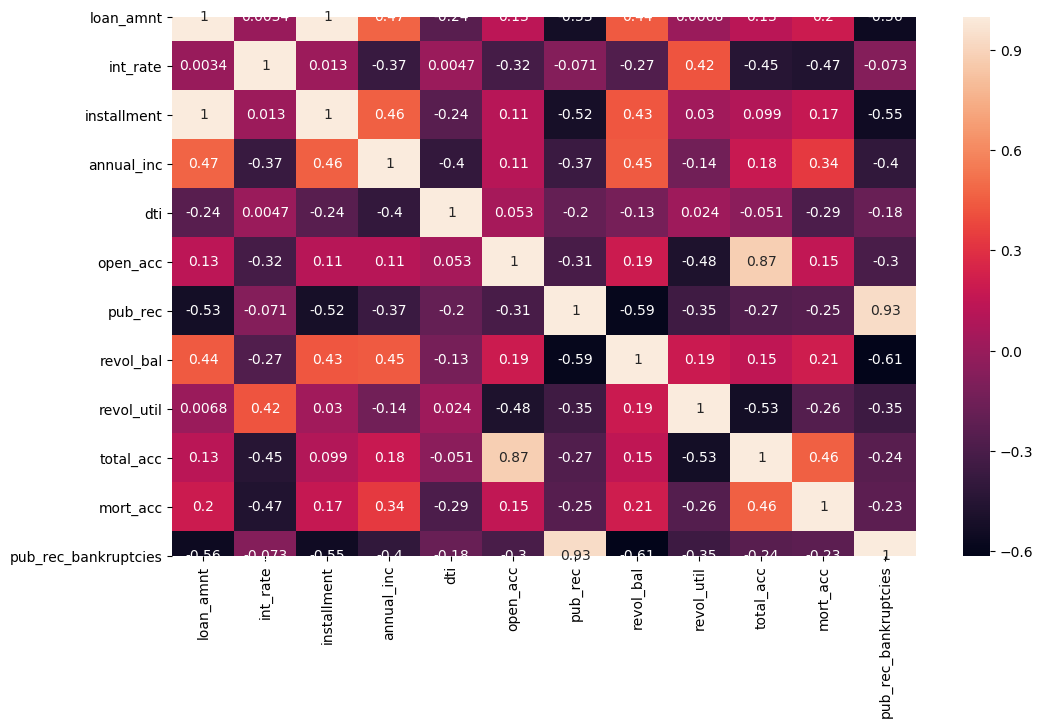

In [11]:
# CODE HERE
plt.figure(figsize=(12,7))
sns.heatmap(a.corr(), annot=True)

(10, 0)

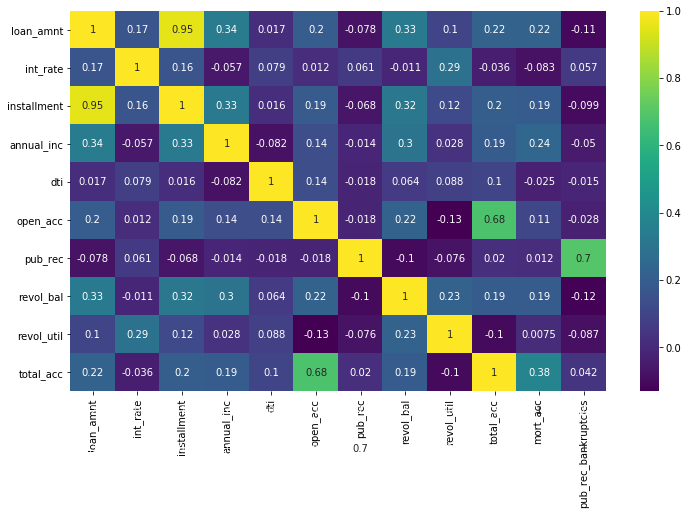

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

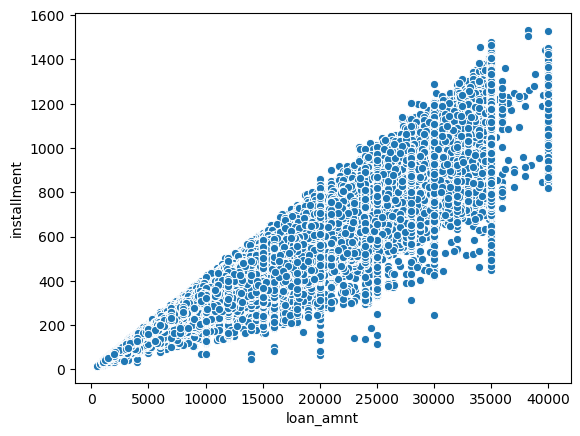

In [12]:
# CODE HERE
sns.scatterplot(x='loan_amnt', y='installment', data=df)

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


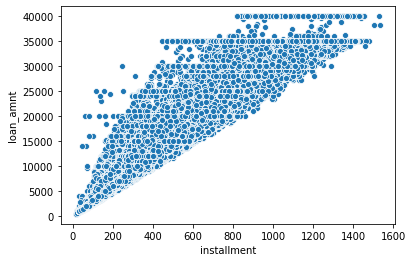

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

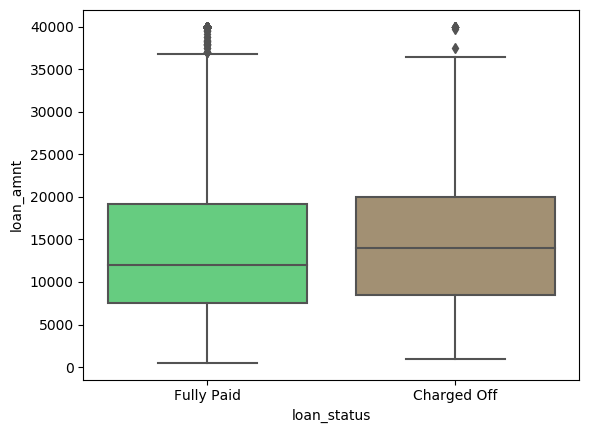

In [13]:
# CODE HERE
sns.boxplot(x='loan_status',y='loan_amnt', data=df, palette='terrain' )

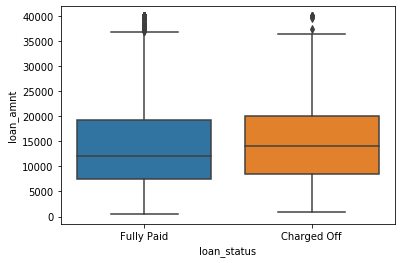

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [14]:
# CODE HERE
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [15]:
# CODE HERE
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

['A', 'B', 'C', 'D', 'E', 'F', 'G']

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

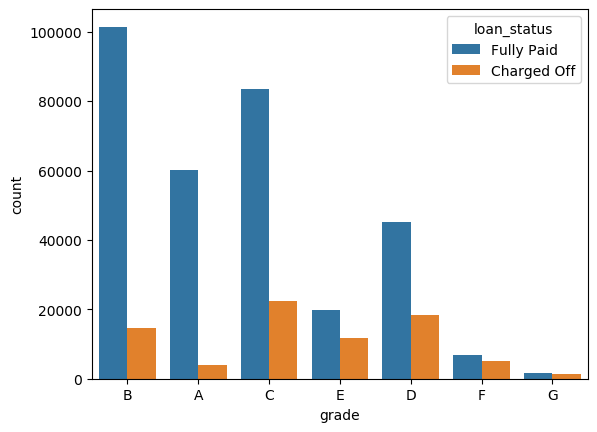

In [16]:
# CODE HERE
sns.countplot(data=df,x='grade',hue='loan_status')

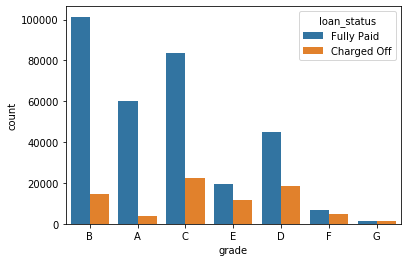

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

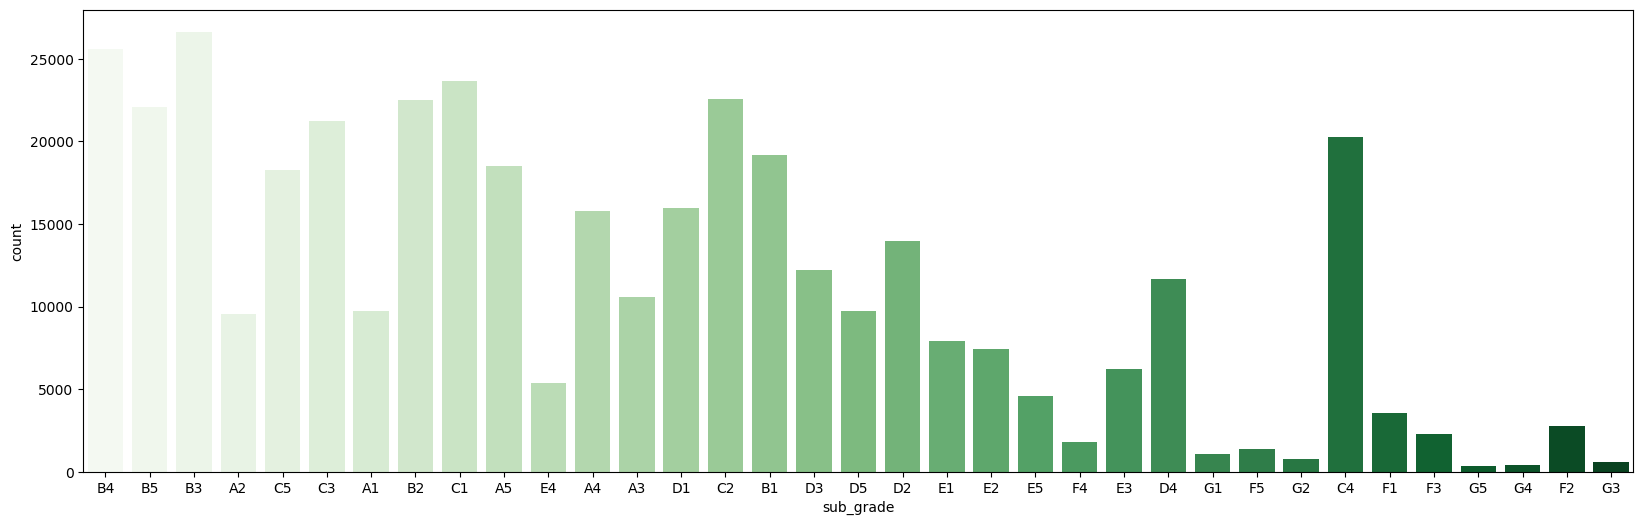

In [17]:
#CODE HERE
plt.figure(figsize=(20, 6))
sns.countplot(data=df,x='sub_grade', palette='Greens' )

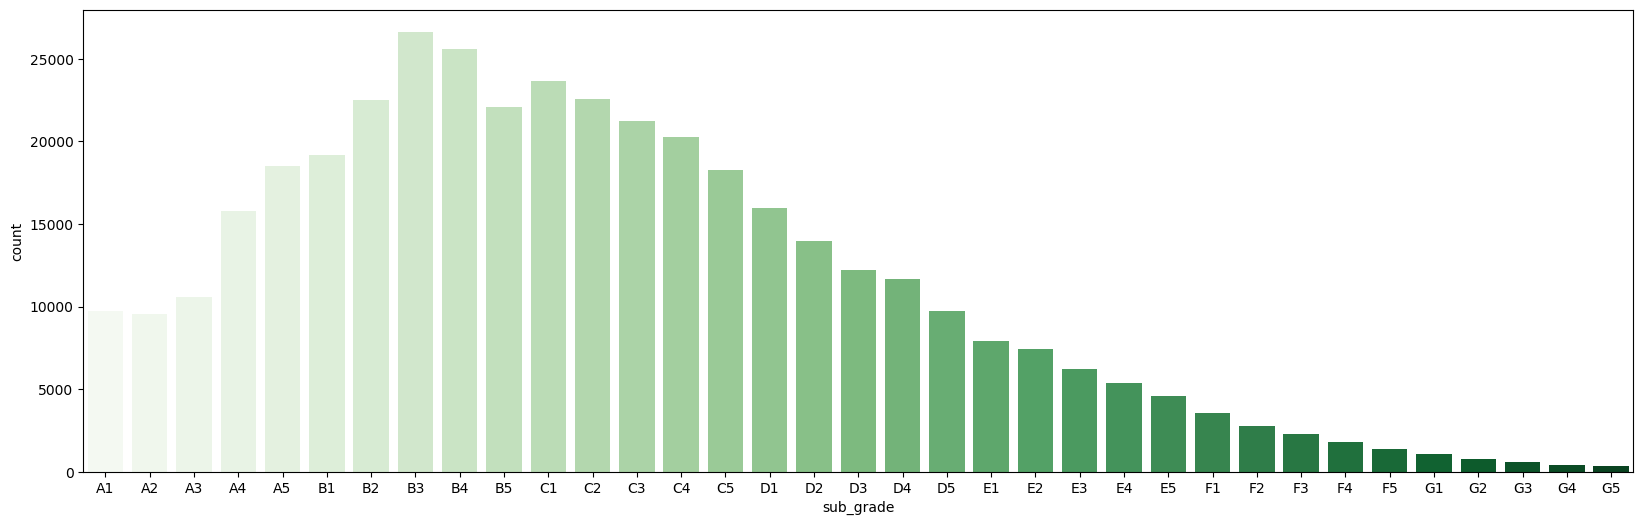

In [18]:
plt.figure(figsize=(20, 6))
sub_grade_order=sorted(df['sub_grade'].unique())
sns.countplot(data=df,x='sub_grade', palette='Greens', order=sub_grade_order )

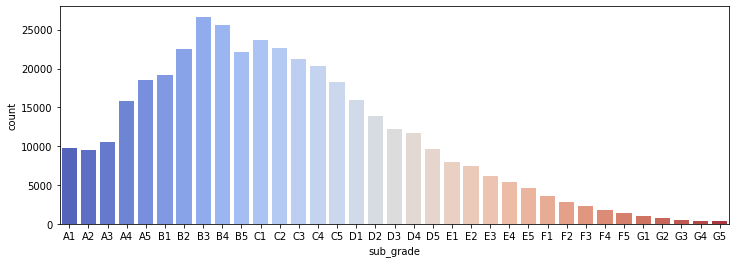

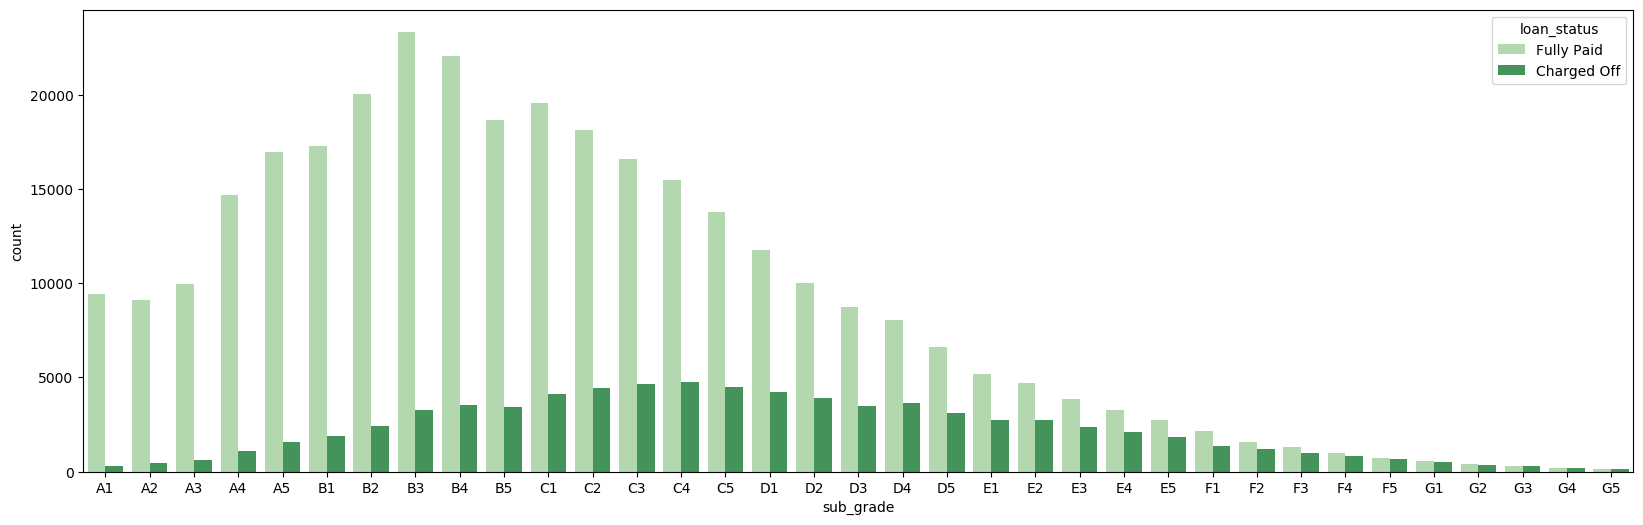

In [19]:
# CODE HERE
plt.figure(figsize=(20, 6))
sns.countplot(data=df,x='sub_grade', palette='Greens', hue='loan_status', order=sub_grade_order)

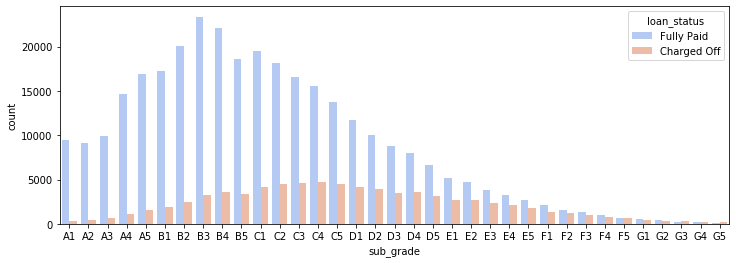

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

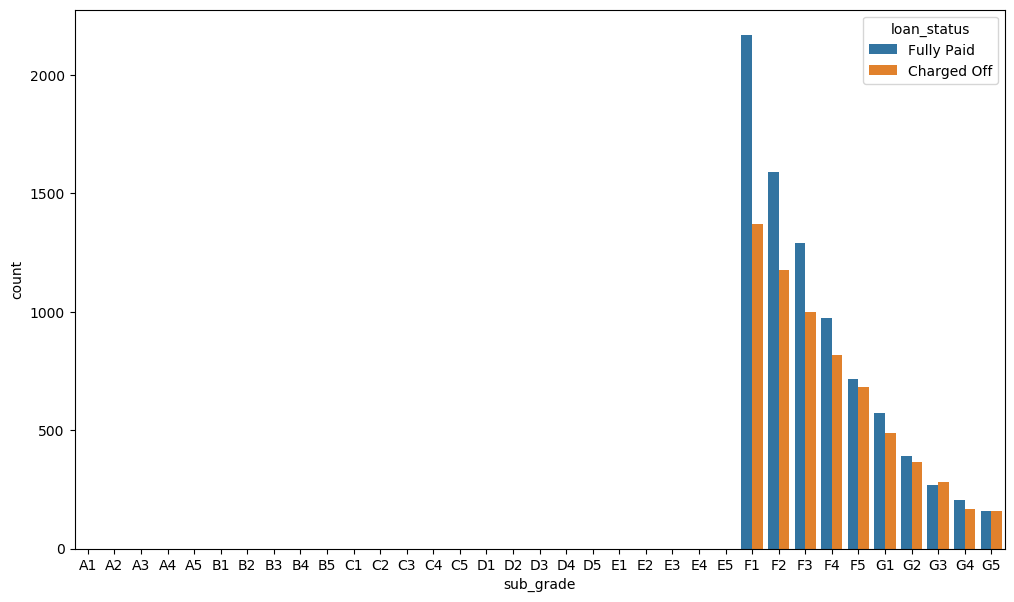

In [21]:
# CODE HERE
a=df[df['grade'].isin(['F','G'])]
plt.figure(figsize=(12,7))
sns.countplot(data=a, x='sub_grade', hue='loan_status', order=sub_grade_order)

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

**ACT**

In [4]:
# CODE HERE
my_map={'Fully Paid':1 , 'Charged Off':0}
df['loan_repaid']=df['loan_status'].map(my_map)
df_cleaned['loan_repaid']=df['loan_repaid']
df[['loan_repaid','loan_status']].head(20)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
5,1,Fully Paid
6,1,Fully Paid
7,1,Fully Paid
8,1,Fully Paid
9,1,Fully Paid


array(['Fully Paid', 'Charged Off'], dtype=object)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [9]:
#CODE HERE
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

newdf.head()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [10]:
newdf.corr()['loan_repaid']

KeyError: 'loan_repaid'

In [11]:
newdf.corr()['loan_repaid'].plot.bar()

KeyError: 'loan_repaid'

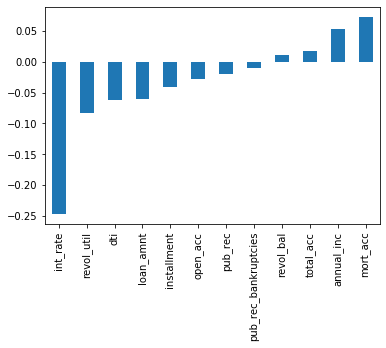

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [26]:
# CODE HERE
df.shape

(396030, 28)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [27]:
# CODE HERE
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [58]:
# CODE HERE
def percentage(x):
  return (x/len(df))*100
df.isnull().sum().apply(percentage)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [48]:
# CODE HERE

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [29]:
# CODE HERE
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [30]:
df['emp_title'].nunique()

173105

In [31]:
df['emp_title'].value_counts()

Teacher                        4389
Manager                        4250
Registered Nurse               1856
RN                             1846
Supervisor                     1830
                               ... 
Sr. iOS Software Developer        1
field Engineer                    1
pacific specialty insurance       1
Manager and Server                1
Cheesecake Factory Inc            1
Name: emp_title, Length: 173105, dtype: int64

173105

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
mechanic/lead                        1
SUPV. MECHINE SHOP                   1
Mcccd                                1
Dr. Dennis Norkiewicz DDS            1
bernie little distributing llc       1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

**Cleaning**

**ACT**

In [5]:
# CODE HERE
df_cleaned=df.drop('emp_title',axis=1)
df_cleaned.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

<AxesSubplot:xlabel='only_years', ylabel='count'>

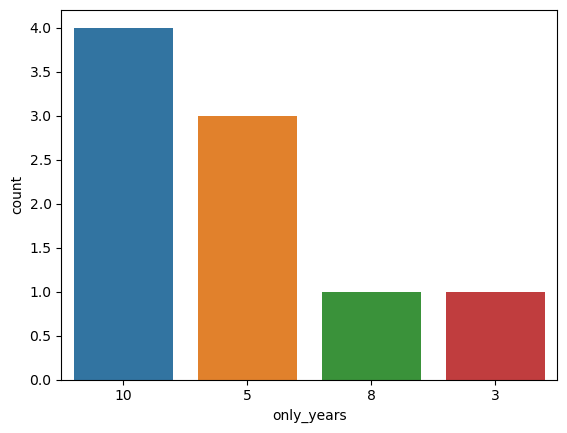

In [11]:
# CODE HERE
data_t = {'years': ['10 years','10 years','10 years','10 years', '5 years','5 years','5 years', '3 years', '8 years']}
df_t = pd.DataFrame(data_t)
df_t['only_years']=df_t['years'].str.extract('(\d+)').astype(int)
df_t['only_years'].sort_values(ascending=False).value_counts().index
sns.countplot(data=df_t, x=df_t['only_years'], order=df_t['only_years'].sort_values(ascending=False).value_counts().index)

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']


str.extract() is a method in pandas that is used to extract substrings from each element in a Series using regular expressions. It returns a DataFrame with one column per group if one capture group is defined in the regular expression, and a DataFrame with one column per capture group if multiple capture groups are defined.

Here's how it works:

You provide a regular expression pattern inside the extract() method.
Pandas will search for this pattern in each element of the Series.
If a match is found, it extracts the matched substring.
It returns a DataFrame with the extracted substrings.
In the previous example, df['years'].str.extract('(\d+)') extracts the numeric part (digits) from each element in the 'years' column using the regular expression (\d+), which captures one or more digits. This results in a DataFrame with one column containing the extracted numeric values.

In [35]:
print(df_cleaned['emp_length'].values)

['10+ years' '4 years' '< 1 year' ... '10+ years' '10+ years' '10+ years']


In [12]:
df_cleaned['emp_length']=df_cleaned['emp_length'].str.extract('(\d+)').astype(float)
df_cleaned['emp_length'].sort_values()

38605     1.0
277537    1.0
187141    1.0
277532    1.0
379671    1.0
         ... 
395946    NaN
395963    NaN
395988    NaN
395999    NaN
396015    NaN
Name: emp_length, Length: 396030, dtype: float64

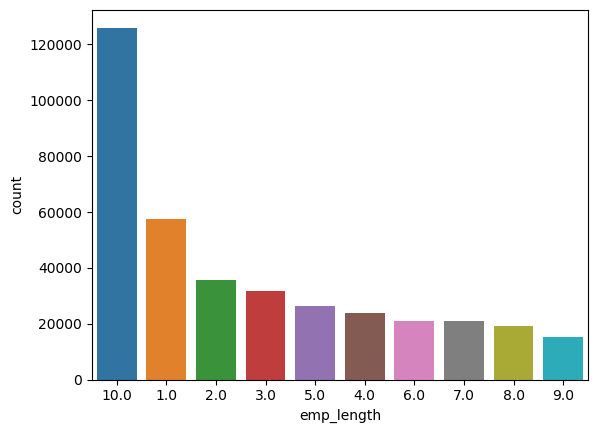

In [37]:
sns.countplot(data=df_cleaned, x=df_cleaned['emp_length'].sort_values(), order=df_cleaned['emp_length'].value_counts().index  )

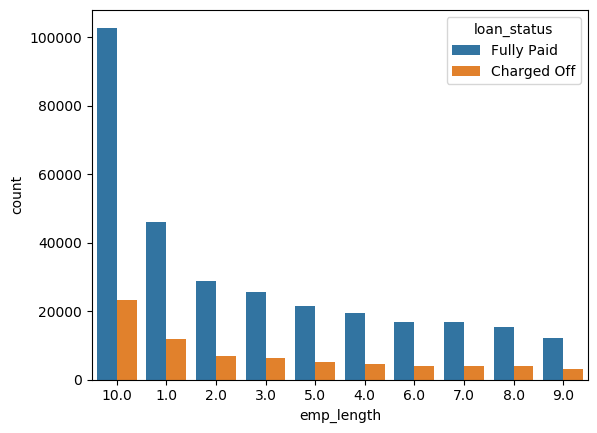

In [38]:
sns.countplot(data=df_cleaned, x=df_cleaned['emp_length'].sort_values(), order=df_cleaned['emp_length'].value_counts().index , hue='loan_status' )

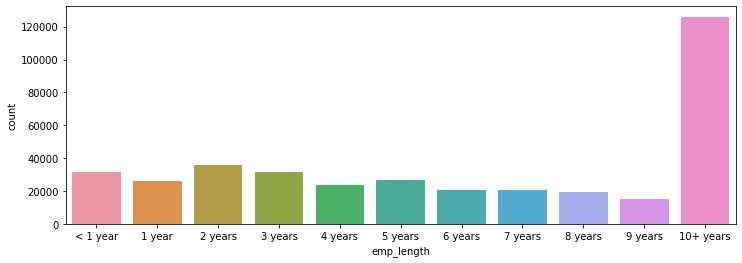

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

In [59]:
# CODE HERE

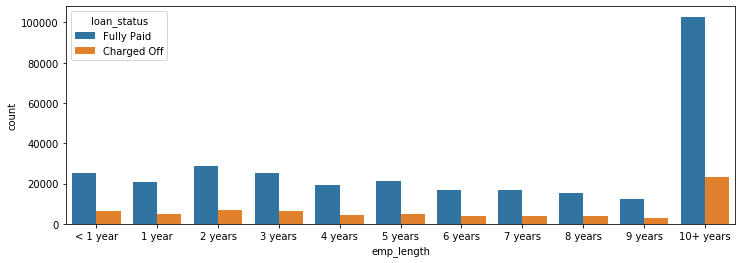

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [39]:
# CODE HERE
d=df.groupby(['emp_length', 'loan_status']).size().unstack()
d

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,5154,20728
10+ years,23215,102826
2 years,6924,28903
3 years,6182,25483
4 years,4608,19344
5 years,5092,21403
6 years,3943,16898
7 years,4055,16764
8 years,3829,15339


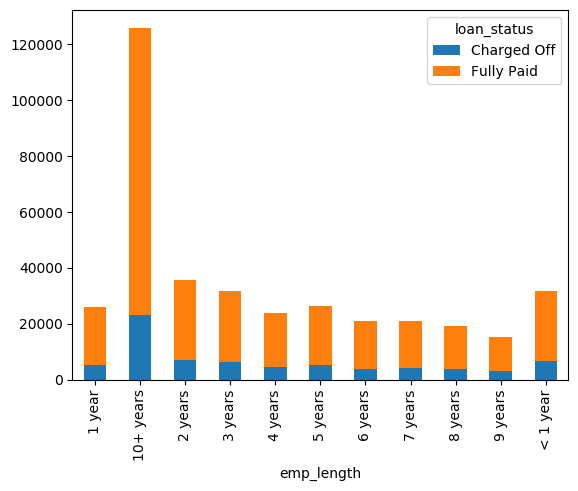

In [40]:
d.plot(kind='bar', stacked=True)

In [41]:
Loan_ch=df_cleaned[df_cleaned['loan_status']=='Charged Off'].groupby('emp_length').size()
Loan_p=df_cleaned[df_cleaned['loan_status']=='Fully Paid'].groupby('emp_length').size()

In [42]:
total = Loan_p + Loan_ch
total

emp_length
1.0      57607
2.0      35827
3.0      31665
4.0      23952
5.0      26495
6.0      20841
7.0      20819
8.0      19168
9.0      15314
10.0    126041
dtype: int64

In [43]:
Loan_ch/total

emp_length
1.0     0.203395
2.0     0.193262
3.0     0.195231
4.0     0.192385
5.0     0.192187
6.0     0.189194
7.0     0.194774
8.0     0.199760
9.0     0.200470
10.0    0.184186
dtype: float64

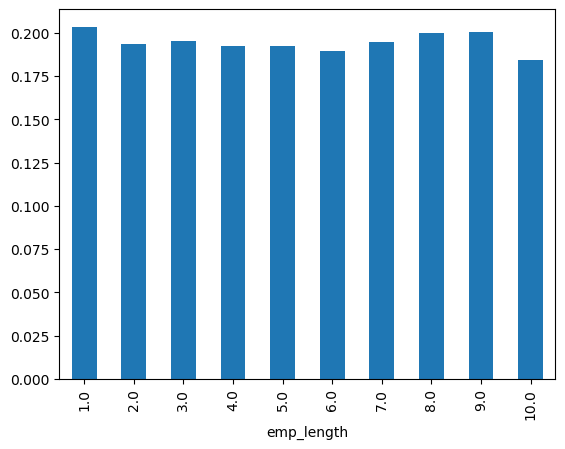

In [44]:
Diagram=Loan_ch/total
Diagram.plot(kind='bar')

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

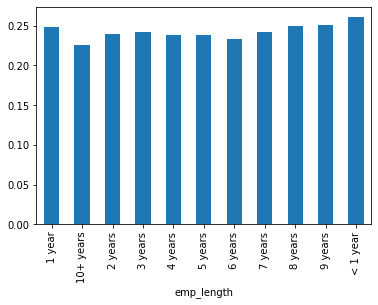

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**
**ACT**

In [6]:
# CODE HERE
df_cleaned=df_cleaned.drop('emp_length', axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [57]:
df_cleaned.isnull().sum()

loan_amnt           0
term                0
int_rate            0
installment         0
annual_inc          0
                   ..
48052               0
70466               0
86630               0
93700               0
earliest_cr_year    0
Length: 85, dtype: int64

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [47]:
# CODE HERE
df_cleaned['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [48]:
df_cleaned['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [49]:
df_cleaned['title'].nunique()

48817

In [50]:
df_cleaned['purpose'].nunique()

14

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [72]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**
**ACT**

In [7]:
# CODE HERE
df_cleaned=df_cleaned.drop('title', axis=1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [75]:
# CODE HERE

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [52]:
# CODE HERE
df_cleaned['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [53]:
df_cleaned['mort_acc'].isnull().sum()

37795

In [54]:
(df_cleaned['mort_acc'].isnull().sum()/len(df_cleaned))*100

9.543468929121532

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

**ACT**

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

newdf.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

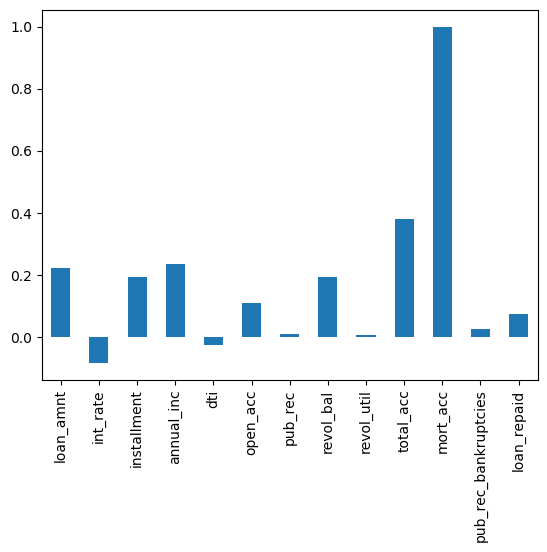

In [56]:
newdf.corr()['mort_acc'].plot(kind='bar')

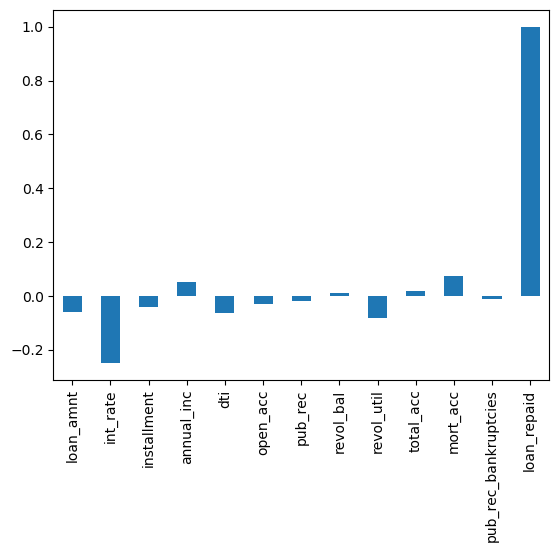

In [57]:
newdf.corr()['loan_repaid'].plot(kind='bar')

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [58]:
# CODE HERE
newdf.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

0.0

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

**ACT**

In [9]:
df_cleaned=df_cleaned.dropna(subset=['revol_util','pub_rec_bankruptcies'])

In [18]:
df_cleaned.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37205
pub_rec_bankruptcies        0
address                     0
loan_repaid                 0
dtype: int64

**ACT**

In [10]:
def fill_mort(y,x):
  if np.isnan(x):
    return newdf.groupby('total_acc').mean()['mort_acc'][y]
  else:
    return x

**ACT**

In [11]:
# CODE HERE
df_cleaned['mort_acc']=df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']), axis=1)

In [61]:
print('hello')

hello


In [62]:
100*(df_cleaned.isnull().sum()/len(df_cleaned))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [65]:
# CODE HERE
df_cleaned.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [66]:
# CODE HERE
df_cleaned['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object

In [67]:
df_cleaned['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

 36 months    301247
 60 months     93972
Name: term, dtype: int64

**ACT**

In [12]:
r={"60 months":60,"36 months":36}
df_cleaned['term'] = df_cleaned['term'].str.strip()
df_cleaned['term']=df_cleaned['term'].map(r)

Note:df_cleaned['term']: This selects the 'term' column from the DataFrame df_cleaned.

.str: This is an accessor provided by pandas to perform string operations on the elements of a Series (or column). It allows you to treat each element of the Series as a string.

.strip(): This is a string method that removes leading and trailing whitespace characters (spaces, tabs, newlines) from each element in the Series. It doesn't modify the original DataFrame but returns a new Series with the stripped strings.

In [70]:
df_cleaned['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

**ACT**

In [13]:
# CODE HERE
df_cleaned=df_cleaned.drop('grade', axis=1)

In [72]:
df_cleaned.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

pd.get_dummies() is a function provided by the pandas library in Python. It is used to convert categorical variables into dummy/indicator variables.

Here's how pd.get_dummies() works:

Input: The function takes as input a DataFrame or Series containing categorical variables that you want to convert into dummy variables.

Output: It returns a DataFrame containing dummy variables for each unique category in the input categorical variable(s).

In [77]:
df_cleaned.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


Sparse encoding: If most of your dummy variables are zeros, consider using a sparse encoding technique. Pandas supports sparse data structures, which can significantly reduce memory usage for large, sparse datasets.

For example, you can use pd.get_dummies() with the sparse=True parameter to create a sparse DataFrame:

python
Copy code
pd.get_dummies(df_cleaned, prefix='sub_grade', sparse=True)
This will create a SparseDataFrame, which stores only non-zero values, saving memory compared to a regular DataFrame.




**ACT**

In [14]:
# CODE HERE
pd.get_dummies(df_cleaned['sub_grade', prefix='sub_grade', sparse=True, drop_first=True)

SyntaxError: invalid syntax (3342020389.py, line 2)

**ACT**

In [15]:
sub=pd.get_dummies(df_cleaned['sub_grade'])

In [16]:
df_cleaned=df_cleaned.drop('sub_grade', axis=1)

In [17]:
df_cleaned=df_cleaned.join(sub)

In [18]:
df_cleaned.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],
      dtype='object')

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

**ACT**

In [19]:
# CODE HERE
dum=pd.get_dummies(df_cleaned['verification_status'])
df_cleaned=df_cleaned.drop('verification_status', axis=1)
df_cleaned=df_cleaned.join(dum)

In [20]:
dum=pd.get_dummies(df_cleaned['application_type'])
df_cleaned=df_cleaned.drop('application_type', axis=1)
df_cleaned=df_cleaned.join(dum)

In [21]:
dum=pd.get_dummies(df_cleaned['initial_list_status'])
df_cleaned=df_cleaned.drop('initial_list_status', axis=1)
df_cleaned=df_cleaned.join(dum)

In [22]:
dum=pd.get_dummies(df_cleaned['purpose'])
df_cleaned=df_cleaned.drop('purpose', axis=1)
df_cleaned=df_cleaned.join(dum)

In [24]:
df_cleaned.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'A1', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Not Verified',
       'Source Verified', 'Verified', 'DIRECT_PAY', 'INDIVIDUAL', 'JOINT', 'f',
       'w', 'car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'],
      dtype='object')

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [43]:
#CODE HERE
df_cleaned['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

drop_first. The drop_first parameter specifies whether or not you want to drop the first category of the categorical variable you're encoding. By default, this is set to drop_first = False . This will cause get_dummies to create one dummy variable for every level of the input categorical variable.

In [39]:
type(df_cleaned['home_ownership'][0])

0

**ACT**

In [23]:
#CODE HERE
r={'OTHER':'OTHER','NONE':'OTHER','ANY':'OTHER','MORTGAGE':'MORTGAGE','RENT':'RENT','OWN':'OWN'}
#df_cleaned['home_ownership'] = df_cleaned['home_ownership'].str.strip()
df_cleaned['home_ownership'].map(r).value_counts()


MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

Easier tasks is using replace function

**ACT**

In [24]:
df_cleaned['home_ownership']=df_cleaned['home_ownership'].replace(['NONE','ANY'],'OTHER')

**ACT**

In [25]:
dum=pd.get_dummies(df_cleaned['home_ownership'], drop_first=True)
df_cleaned=df_cleaned.drop('home_ownership', axis=1)
df_cleaned=df_cleaned.join(dum)

In [28]:
df_cleaned.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'Not Verified', 'Source Verified',
       'Verified', 'DIRECT_PAY', 'INDIVIDUAL', 'JOINT', 'f', 'w', 'car',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER',
       'OWN', 'RENT'],
      dtype='object')

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [62]:
#CODE HERE
print(df_cleaned['address'][0])

0174 Michelle Gateway
Mendozaberg, OK 22690


In [67]:
print(df_cleaned['address'][0][-9:])

 OK 22690


**ACT**

In [26]:
def zipcode(address):
   address[-9:]

**ACT**

In [27]:
Zip=df_cleaned['address']
Zip=Zip.apply(lambda x: x[-5:] )

In [97]:
Zip.head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: address, dtype: object

**ACT**

In [28]:
df_cleaned=df_cleaned.drop('address', axis=1)

In [32]:
df_cleaned.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'Not Verified', 'Source Verified', 'Verified',
       'DIRECT_PAY', 'INDIVIDUAL', 'JOINT', 'f', 'w', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

**ACT**

In [29]:
df_cleaned = pd.concat([df_cleaned, Zip], axis=1)
df_cleaned['address'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: address, dtype: object

In [34]:
df_cleaned['address'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: address, dtype: int64

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

**ACT**

In [30]:
dum=pd.get_dummies(df_cleaned['address'],drop_first=True)
df_cleaned=df_cleaned.drop('address', axis=1)
df_cleaned=df_cleaned.join(dum)
df_cleaned.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
df_cleaned.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'Not Verified', 'Source Verified', 'Verified',
       'DIRECT_PAY', 'INDIVIDUAL', 'JOINT', 'f', 'w', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'OTHER', 'OWN', 'RENT',
       '05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630',
       '93700'],
      dtype='object')

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

**ACT**

In [31]:
#CODE HERE
df_cleaned=df_cleaned.drop('issue_d', axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

**ACT**

In [32]:
#CODE HERE
df_cleaned['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [38]:
df_cleaned['earliest_cr_line'][0][-4:]

'1990'

**ACT**

In [33]:
earliest_cr_year=df_cleaned['earliest_cr_line'].apply(lambda x: int(x[-4:]))

**ACT**

In [34]:
df_cleaned=df_cleaned.drop('earliest_cr_line', axis=1)
df_cleaned=df_cleaned.join(earliest_cr_year)

In [41]:
df_cleaned.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'A1', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Not Verified',
       'Source Verified', 'Verified', 'DIRECT_PAY', 'INDIVIDUAL', 'JOINT', 'f',
       'w', 'car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723',
       '48052', '70466', '86630', '93700', 'earliest_cr_line'],
      dtype='object')

**ACT**

In [35]:
df_cleaned = df_cleaned.rename(columns={'earliest_cr_line': 'earliest_cr_year'})

In [36]:
df_cleaned['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

## Train Test Split

**TASK: Import train_test_split from sklearn.**

ACT

In [37]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

**ACT**

In [38]:
# CODE HERE
df_cleaned=df_cleaned.drop('loan_status', axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [50]:
df_cleaned.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'Not Verified', 'Source Verified',
       'Verified', 'DIRECT_PAY', 'INDIVIDUAL', 'JOINT', 'f', 'w', 'car',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER',
       'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', '48052',
       '70466', '86630', '93700', 'earliest_cr_year'],
      dtype='object')

ACT

In [39]:
#CODE HERE
X=df_cleaned.drop('loan_repaid', axis=1).values

ACT

In [40]:
y=df_cleaned['loan_repaid'].values

ACT

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
X_train.shape

(276653, 83)

In [43]:
X_test.shape

(118566, 83)

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [53]:
df_cleaned.isnull().sum()

loan_amnt           0
term                0
int_rate            0
installment         0
annual_inc          0
                   ..
70466               0
86630               0
93700               0
earliest_cr_year    0
loan_repaid         0
Length: 84, dtype: int64

In [95]:
df_cleaned2 = df_cleaned.sample(frac=0.6,random_state=101)

In [96]:
print(len(df_cleaned2))

9485


In [97]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

396030


In [98]:
X=df_cleaned2.drop('loan_repaid', axis=1).values
y=df_cleaned2['loan_repaid'].values

**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

ACT

In [149]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [150]:
scaler=MinMaxScaler()

In [151]:
X_train=scaler.fit_transform(X_train)

In [152]:
X_test=scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [99]:
conda create -n newenvt anaconda python=python_version

Retrieving notices: ...working... done
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - python=python_version

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [107]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


In [108]:
pip install tensorflow

     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 kB ? eta 0:00:00
   ---------------------------------------- 376.9/376.9 MB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 133.7/133.7 kB 8.2 MB/s eta 0:00:00
   ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 3.9/3.9 MB 12.5 MB/s eta 0:00:00
   ---------------------------------------- 3.0/3.0 MB 11.9 MB/s eta 0:00:00
   ---------------------------------------- 1.1/1.1 MB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 26.4/26.4 MB 12.3 MB/s eta 0:00:00
   ---------------------------------------- 127.7/127.7 kB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 15.8/15.8 MB 13.1 MB/s eta 0:00:00
   ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 413.4/413.4 kB 8.6

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.


In [112]:
pip show tensorflow

Name: tensorflowNote: you may need to restart the kernel to use updated packages.

Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\moham\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 


ACT

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

ACT

In [49]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))


# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()
model.compile(loss='binary_crossentropy', optimizer='adam')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

ACT

In [51]:
# CODE HERE
model.fit(x=X_train, 
          y=y_train, 
          epochs=80,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/80
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7326 - val_loss: 0.3679
Epoch 2/80
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4906 - val_loss: 0.3567
Epoch 3/80
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4188 - val_loss: 0.3338
Epoch 4/80
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3718 - val_loss: 0.3163
Epoch 5/80
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3440 - val_loss: 0.2949
Epoch 6/80
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3219 - val_loss: 0.2848
Epoch 7/80
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2992 - val_loss: 0.2819
Epoch 8/80
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2912 - val_loss: 0.2880
Epoch 9/80
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3067 - val_loss: 0.2981
Epoch 10/80
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2966 - val_loss: 0.2706
Epoch 11/80
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2862 - val_loss: 0.2721
Epoch 12/80
1081/1081 ━━━━━━━━

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2959 - val_loss: 0.2652
Epoch 2/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2652 - val_loss: 0.2643
Epoch 3/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2628 - val_loss: 0.2626
Epoch 4/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2613 - val_loss: 0.2621
Epoch 5/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2609 - val_loss: 0.2621
Epoch 6/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2603 - val_loss: 0.2618
Epoch 7/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2600 - val_loss: 0.2616
Epoch 8/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2595 - val_loss: 0.2616
Epoch 9/25
316175/316175 [==============================] - 3s 10us/sample - 

**TASK: OPTIONAL: Save your model.**

In [100]:
# CODE HERE
from tensorflow.keras.models import load_model

In [101]:
model.save('full_data_project_model.h5') 

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [52]:
# CODE HERE
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

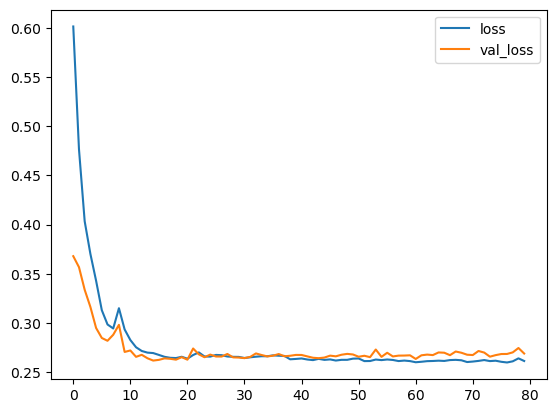

In [53]:
losses[['loss','val_loss']].plot()

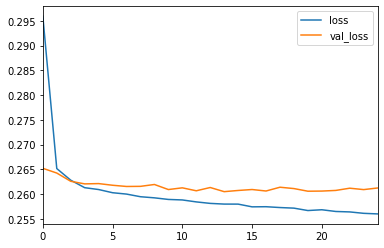

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [102]:
# CODE HERE
from sklearn.metrics import classification_report,confusion_matrix

In [185]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3706/3706 ━━━━━━━━━━━━━━━━━━━━ 3s 674us/step


In [186]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23210
           1       0.88      1.00      0.94     95356

    accuracy                           0.89    118566
   macro avg       0.94      0.71      0.77    118566
weighted avg       0.90      0.89      0.87    118566



              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



array([[ 6850,  8808],
       [  100, 63286]], dtype=int64)

**TASK: Given the customer below, would you offer this person a loan?**

In [192]:
import random
random.seed(101)
random_ind = random.randint(0,len(df_cleaned))
value=df_cleaned['loan_repaid'].iloc[random_ind]
new_customer =df_cleaned.drop('loan_repaid',axis=1).iloc[random_ind]
print(value)
print(new_customer)

1
loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 83, dtype: float64


In [193]:
print(value)

1


In [194]:
new_customer.shape

(83,)

In [195]:
predictions = model.predict(new_customer.values.reshape(1, 83))
predicted_class = np.argmax(predictions, axis=1)

print(predicted_class)

TypeError: 'numpy.ndarray' object is not callable

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [121]:
# CODE HERE
df_cleaned.iloc[random_ind]['loan_repaid']

1.0

1.0

# GREAT JOB!